In [1]:
import numpy as np
import pandas as pd
import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

['d:\\Repositories\\PhD\\notebooks\\HHT', 'd:\\Anaconda\\envs\\ai-env-torch\\python310.zip', 'd:\\Anaconda\\envs\\ai-env-torch\\DLLs', 'd:\\Anaconda\\envs\\ai-env-torch\\lib', 'd:\\Anaconda\\envs\\ai-env-torch', '', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32\\lib', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\Pythonwin', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [2]:
from hht_graphs import *
from hht_fe import HHT_FeatureExtraction

In [3]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")

In [4]:
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [5]:
df[['HUMIDITY%', 'TEMPERATURE_Celsius', 'RPM']].value_counts()

HUMIDITY%  TEMPERATURE_Celsius  RPM 
100         15                  1500    15958
50          0                   1500    14323
0           0                   1500    13792
           -10                  1500    13741
            15                  1500    13185
100        -10                  1000    13153
            0                   1000    12337
50          45                  2000    12205
0           45                  1500    12174
            30                  1500    12101
100         15                  2000    11919
50          30                  2000    11891
0           0                   1000    11317
100         30                  2000    10628
           -10                  1500    10379
0           45                  2000    10349
            0                   2000    10341
100         45                  2000    10281
50         -10                  1000    10170
            0                   1000    10107
            45                  1000     98

In [6]:
df_healthy = df[(df['FAULT'] == 0) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30) & (df['RPM'] == 1500)]
df_healthy

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
264900,0.002000,0.125011,0.147675,0.000000,0.150251,0.181481,0.228073,1.844760e-15,2.28746,2.26479,...,0,0,0,0,0,1500,50,30,0.327915,-1.115002
264901,0.002100,0.125011,0.147675,0.000000,0.150251,0.181481,0.228073,1.844760e-15,2.28746,2.26479,...,0,0,0,0,0,1500,50,30,0.327915,-1.115002
264902,0.007583,0.125011,0.147675,0.000000,0.171445,0.201029,0.201692,1.493470e-15,2.75860,4.10198,...,0,0,0,0,0,1500,50,30,0.332394,-1.101435
264903,0.011083,0.125011,0.148563,0.000013,0.156642,0.203563,0.182315,1.826370e-15,2.41381,2.53005,...,0,0,0,0,0,1500,50,30,0.314982,-1.155241
264904,0.014367,0.125011,0.144251,0.000014,0.129525,0.137539,0.163945,1.835430e-15,2.40209,3.66579,...,0,0,0,0,0,1500,50,30,0.250143,-1.385721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266408,5.274800,0.500044,0.512998,0.037333,0.524182,0.540798,1.357400,1.731850e-15,3.06195,3.09579,...,0,0,0,0,0,1500,50,30,1.552341,0.439764
266409,5.278070,0.500044,0.512715,0.037336,0.524467,0.540949,1.357320,1.732510e-15,3.06024,3.09217,...,0,0,0,0,0,1500,50,30,1.552420,0.439815
266410,5.281450,0.500044,0.512715,0.037339,0.524042,0.540655,1.353490,1.730590e-15,3.05955,3.09230,...,0,0,0,0,0,1500,50,30,1.548826,0.437497
266411,5.284830,0.500044,0.512715,0.037341,0.523561,0.539940,1.348320,1.732050e-15,3.05845,3.09203,...,0,0,0,0,0,1500,50,30,1.543897,0.434310


In [7]:
df_faulty = df[(df['FAULT'] == 1) & (df['HUMIDITY%'] == 50) & (df['TEMPERATURE_Celsius'] == 30) & (df['RPM'] == 1500)]
df_faulty

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
263122,0.000867,0.125011,0.185784,0.000000,0.197682,0.274150,0.273640,1.837270e-15,2.20160,2.70006,...,0,0,0,0,1,1500,50,30,0.434874,-0.832699
263123,0.000917,0.125011,0.185784,0.000000,0.197682,0.274150,0.273640,1.837270e-15,2.20160,2.70006,...,0,0,0,0,1,1500,50,30,0.434874,-0.832699
263124,0.005567,0.125011,0.185784,0.000013,0.183951,0.262069,0.277433,1.666460e-15,2.59458,2.81699,...,0,0,0,0,1,1500,50,30,0.423659,-0.858826
263125,0.008850,0.125011,0.181268,0.000014,0.176455,0.277912,0.289267,1.933900e-15,2.26675,3.10681,...,0,0,0,0,1,1500,50,30,0.438231,-0.825008
263126,0.012233,0.125011,0.181268,0.000015,0.189123,0.220359,0.179586,1.699430e-15,2.68025,2.48452,...,0,0,0,0,1,1500,50,30,0.341433,-1.074603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264895,1.617900,0.500044,0.543897,0.029016,0.596835,0.551767,1.107220,1.712160e-15,3.01228,3.10564,...,0,0,0,0,1,1500,50,30,1.373534,0.317387
264896,1.621380,0.500044,0.543897,0.029018,0.597188,0.552069,1.106780,1.712350e-15,3.01034,3.09967,...,0,0,0,0,1,1500,50,30,1.373454,0.317329
264897,1.624670,0.500044,0.543734,0.029022,0.597184,0.551420,1.108460,1.711710e-15,3.00661,3.09819,...,0,0,0,0,1,1500,50,30,1.374546,0.318123
264898,1.628000,0.500044,0.543734,0.029027,0.596193,0.550414,1.104780,1.708450e-15,3.00943,3.10048,...,0,0,0,0,1,1500,50,30,1.370745,0.315354


In [8]:
df_faulty.columns

Index(['Time', 'Demand 1', 'Control 1', 'Output Drive 1', 'Channel 1',
       'Channel 2', 'Channel 3', 'Channel 4', 'Channel 1 Kurtosis',
       'Channel 2 Kurtosis', 'Channel 3 Kurtosis', 'Channel 4 Kurtosis',
       'Rear Input 1', 'Rear Input 2', 'Rear Input 3', 'Rear Input 4',
       'Rear Input 5', 'Rear Input 6', 'Rear Input 7', 'Rear Input 8', 'FAULT',
       'RPM', 'HUMIDITY%', 'TEMPERATURE_Celsius',
       'resultant_vibration_magnitude',
       'resultant_vibration_magnitude_normal_dist'],
      dtype='object')

In [9]:
c1_healthy = df_healthy['Channel 1']
c2_healthy = df_healthy['Channel 2']
c3_healthy = df_healthy['Channel 3']

c1_faulty = df_faulty['Channel 1']
c2_faulty = df_faulty['Channel 2']
c3_faulty = df_faulty['Channel 3']

In [10]:
fs = 3200  # Hz
N_healthy = len(c1_healthy)
N_faulty = len(c1_faulty)
t_healthy = np.arange(N_healthy) / fs
t_faulty = np.arange(N_faulty) / fs

In [11]:
hht = HHT()

res_healthy = hht.transform(c1_healthy, fs, t_healthy)
res_faulty = hht.transform(c1_faulty, fs, t_faulty)

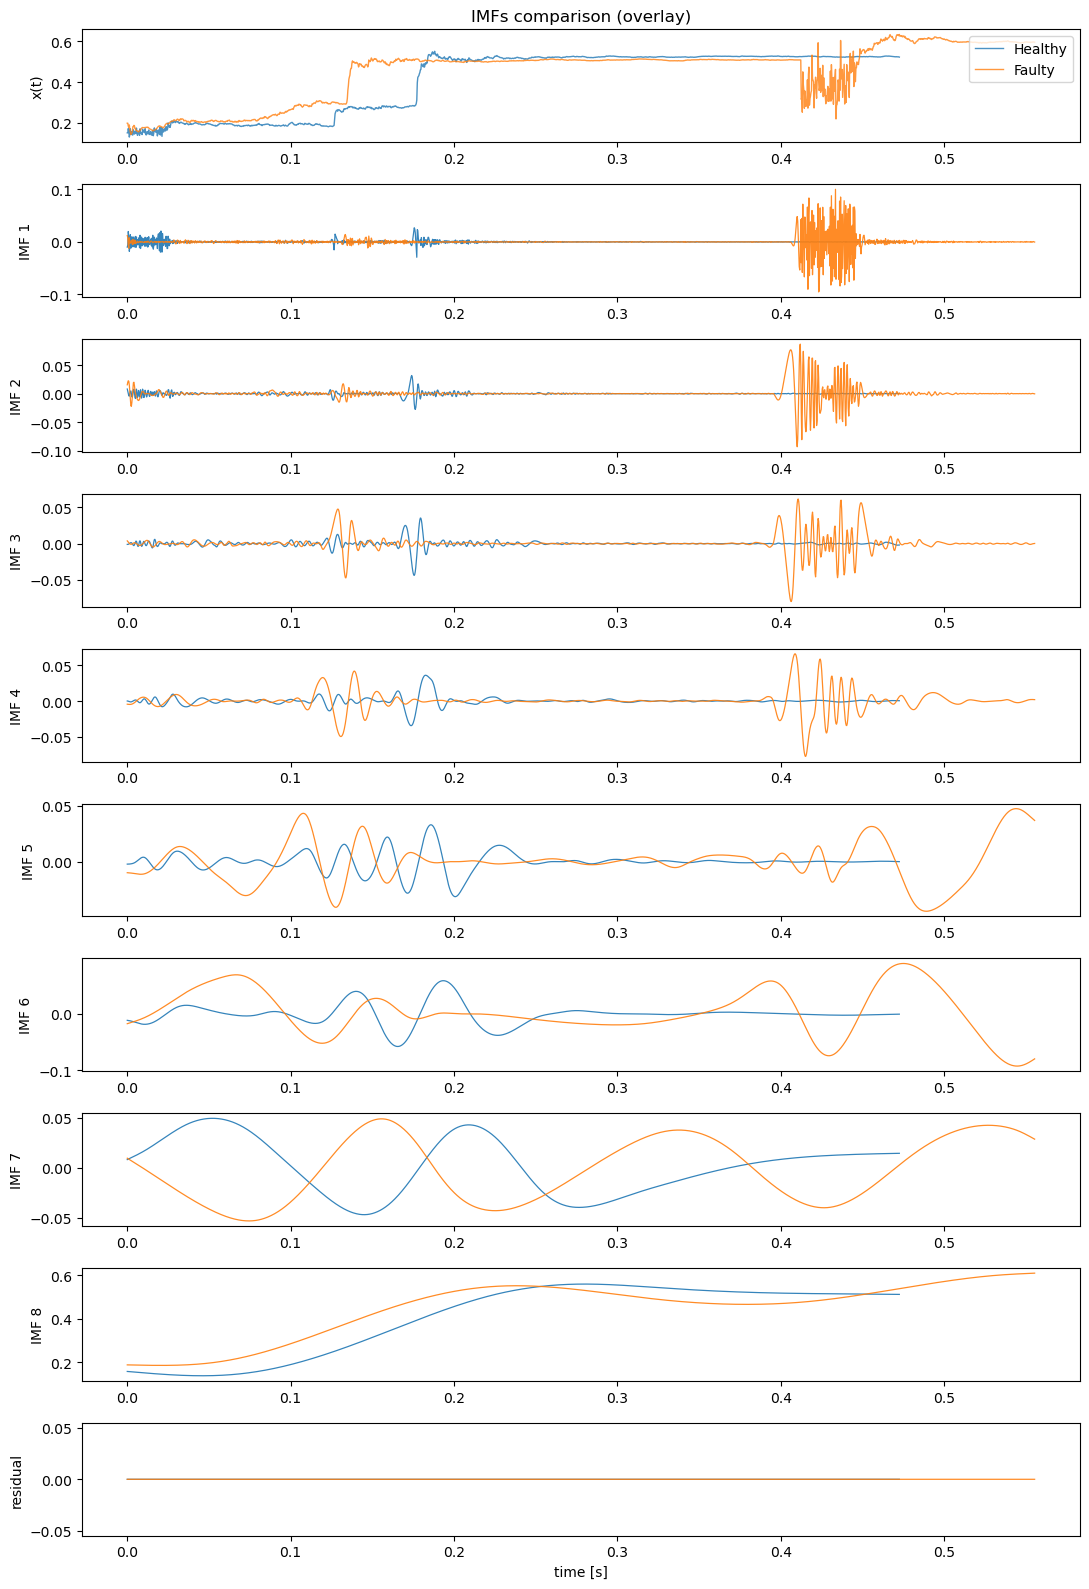

In [12]:
plot_imfs_compare(c1_healthy, t_healthy, res_healthy['imfs'], res_healthy['residual'],
                  c1_faulty, t_faulty, res_faulty['imfs'], res_faulty['residual'],
                  labels=("Healthy","Faulty"), title="IMFs comparison (overlay)")

# Feature Extraction

In [11]:
hht_fe_class = HHT_FeatureExtraction()

In [12]:
c1_fe_healthy = hht_fe_class.windowed_hht_table(c1_healthy, fs, win_s=0.2, step_s=0.0005)

In [18]:
c1_fe_faulty = hht_fe_class.windowed_hht_table(c1_faulty, fs, win_s = 0.2, step_s = 0.001)

In [14]:
healthy_fe_df = pd.DataFrame(data = c1_fe_healthy[0], columns = c1_fe_healthy[1])
healthy_fe_df['fault'] = 0
healthy_fe_df

,imf1_rms,imf1_crest,imf1_kurt,imf1_skew,imf1_zcr,imf1_amp_mean,imf1_amp_std,imf1_amp_p95,imf1_f_mean,imf1_f_std,...,env_peak1_amp,env_peak2_freq,env_peak2_amp,env_peak3_freq,env_peak3_amp,env_peak4_freq,env_peak4_amp,env_peak5_freq,env_peak5_amp,fault
0,0.004870,5.954379,11.192755,0.317989,0.652582,0.004451,0.005823,0.017310,807.861701,386.688874,...,37.748559,5.0,24.862228,10.0,15.563762,15.0,13.848288,20.0,6.514098,0
1,0.004969,6.642543,12.724908,0.702598,0.652582,0.004409,0.005815,0.017164,807.113427,387.502687,...,38.473443,5.0,25.299454,10.0,15.717875,15.0,13.782497,20.0,6.222051,0
2,0.004915,6.360189,12.645192,-0.332859,0.654147,0.004391,0.005805,0.017359,807.454763,392.749934,...,22.807835,5.0,14.850247,10.0,7.108608,15.0,2.746257,20.0,1.258482,0
3,0.004739,6.595929,12.035800,0.116306,0.654147,0.004346,0.005806,0.017218,803.560088,391.432772,...,22.078709,5.0,12.985837,10.0,5.067308,15.0,3.195917,20.0,3.083169,0
4,0.004652,6.233266,12.072649,0.326311,0.655712,0.004261,0.005754,0.017311,796.884414,388.100134,...,22.851260,5.0,13.722488,10.0,5.529176,15.0,3.522520,20.0,3.249586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0.000294,6.116861,5.475428,-0.516871,0.619718,0.000372,0.000182,0.000689,834.500213,350.579366,...,0.894322,5.0,0.229233,10.0,0.180917,15.0,0.180606,45.0,0.104103,0
433,0.000264,3.976033,2.880263,-0.039676,0.643192,0.000364,0.000170,0.000657,858.835266,345.238673,...,1.012772,10.0,0.144911,20.0,0.138624,35.0,0.133521,5.0,0.107504,0
434,0.000259,3.851774,2.736369,-0.042616,0.649452,0.000357,0.000164,0.000627,865.990160,343.306502,...,1.158812,20.0,0.149289,35.0,0.140841,5.0,0.126065,15.0,0.124036,0
435,0.000302,7.398507,10.181995,-1.142858,0.627543,0.000371,0.000179,0.000675,831.081141,349.314860,...,0.851641,5.0,0.203577,15.0,0.194181,10.0,0.193592,20.0,0.137304,0


In [20]:
faulty_fe_df = pd.DataFrame(data = c1_fe_faulty[0], columns = c1_fe_faulty[1])
faulty_fe_df['fault'] = 1
faulty_fe_df

,imf1_rms,imf1_crest,imf1_kurt,imf1_skew,imf1_zcr,imf1_amp_mean,imf1_amp_std,imf1_amp_p95,imf1_f_mean,imf1_f_std,...,env_peak1_amp,env_peak2_freq,env_peak2_amp,env_peak3_freq,env_peak3_amp,env_peak4_freq,env_peak4_amp,env_peak5_freq,env_peak5_amp,fault
0,0.002422,9.662474,23.846039,2.025337,0.586854,0.002432,0.002030,0.006627,756.742151,322.285101,...,22.050727,5.0,4.761173,10.0,4.628148,15.0,1.588367,20.0,1.233088,1
1,0.002154,5.221872,8.661072,-0.156769,0.586854,0.002461,0.002059,0.006817,744.386234,319.757799,...,29.130162,10.0,7.743869,5.0,5.828838,15.0,3.941201,20.0,2.815268,1
2,0.002173,5.184644,8.594858,0.265977,0.582160,0.002489,0.002132,0.007638,731.056935,317.622630,...,24.136151,10.0,5.289100,5.0,5.039124,15.0,2.240402,20.0,0.847682,1
3,0.002800,12.521234,59.501220,-4.687823,0.579030,0.002558,0.002136,0.007661,707.320581,327.479442,...,25.148863,10.0,5.969226,5.0,4.145537,15.0,2.642837,20.0,1.537827,1
4,0.002122,5.310978,8.685023,0.159056,0.582160,0.002485,0.002139,0.007644,731.743479,317.277549,...,22.504296,10.0,5.534268,5.0,4.925098,15.0,2.227393,20.0,1.057813,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.022409,4.636848,9.964990,-0.185538,0.649452,0.018889,0.033023,0.097909,1001.243585,371.555495,...,12.790649,5.0,8.563235,10.0,5.964661,15.0,4.404400,30.0,2.810645,1
376,0.022409,4.636857,9.965196,-0.186094,0.649452,0.018930,0.033054,0.097978,1001.464903,371.346579,...,343.018954,5.0,31.676432,10.0,11.235617,35.0,5.975098,30.0,5.845192,1
377,0.022409,4.636846,9.965156,-0.186307,0.652582,0.018704,0.032912,0.097638,1001.143608,371.624782,...,12.544809,5.0,8.873789,10.0,6.030884,15.0,4.146583,30.0,2.835275,1
378,0.022083,4.534599,9.677160,-0.076031,0.652582,0.019145,0.032635,0.094874,1016.645856,364.902741,...,41.046821,5.0,14.244121,10.0,7.158177,20.0,1.359335,30.0,1.327774,1


In [21]:
df_cl = pd.concat(
    (
        healthy_fe_df,
        faulty_fe_df
    )
)

In [22]:
df_cl

,imf1_rms,imf1_crest,imf1_kurt,imf1_skew,imf1_zcr,imf1_amp_mean,imf1_amp_std,imf1_amp_p95,imf1_f_mean,imf1_f_std,...,env_peak1_amp,env_peak2_freq,env_peak2_amp,env_peak3_freq,env_peak3_amp,env_peak4_freq,env_peak4_amp,env_peak5_freq,env_peak5_amp,fault
0,0.004870,5.954379,11.192755,0.317989,0.652582,0.004451,0.005823,0.017310,807.861701,386.688874,...,37.748559,5.0,24.862228,10.0,15.563762,15.0,13.848288,20.0,6.514098,0
1,0.004969,6.642543,12.724908,0.702598,0.652582,0.004409,0.005815,0.017164,807.113427,387.502687,...,38.473443,5.0,25.299454,10.0,15.717875,15.0,13.782497,20.0,6.222051,0
2,0.004915,6.360189,12.645192,-0.332859,0.654147,0.004391,0.005805,0.017359,807.454763,392.749934,...,22.807835,5.0,14.850247,10.0,7.108608,15.0,2.746257,20.0,1.258482,0
3,0.004739,6.595929,12.035800,0.116306,0.654147,0.004346,0.005806,0.017218,803.560088,391.432772,...,22.078709,5.0,12.985837,10.0,5.067308,15.0,3.195917,20.0,3.083169,0
4,0.004652,6.233266,12.072649,0.326311,0.655712,0.004261,0.005754,0.017311,796.884414,388.100134,...,22.851260,5.0,13.722488,10.0,5.529176,15.0,3.522520,20.0,3.249586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.022409,4.636848,9.964990,-0.185538,0.649452,0.018889,0.033023,0.097909,1001.243585,371.555495,...,12.790649,5.0,8.563235,10.0,5.964661,15.0,4.404400,30.0,2.810645,1
376,0.022409,4.636857,9.965196,-0.186094,0.649452,0.018930,0.033054,0.097978,1001.464903,371.346579,...,343.018954,5.0,31.676432,10.0,11.235617,35.0,5.975098,30.0,5.845192,1
377,0.022409,4.636846,9.965156,-0.186307,0.652582,0.018704,0.032912,0.097638,1001.143608,371.624782,...,12.544809,5.0,8.873789,10.0,6.030884,15.0,4.146583,30.0,2.835275,1
378,0.022083,4.534599,9.677160,-0.076031,0.652582,0.019145,0.032635,0.094874,1016.645856,364.902741,...,41.046821,5.0,14.244121,10.0,7.158177,20.0,1.359335,30.0,1.327774,1


In [23]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score

In [24]:
xgbc = xgboost.XGBClassifier()

In [25]:
X = df_cl.iloc[:, :-1]
X

,imf1_rms,imf1_crest,imf1_kurt,imf1_skew,imf1_zcr,imf1_amp_mean,imf1_amp_std,imf1_amp_p95,imf1_f_mean,imf1_f_std,...,env_peak1_freq,env_peak1_amp,env_peak2_freq,env_peak2_amp,env_peak3_freq,env_peak3_amp,env_peak4_freq,env_peak4_amp,env_peak5_freq,env_peak5_amp
0,0.004870,5.954379,11.192755,0.317989,0.652582,0.004451,0.005823,0.017310,807.861701,386.688874,...,0.0,37.748559,5.0,24.862228,10.0,15.563762,15.0,13.848288,20.0,6.514098
1,0.004969,6.642543,12.724908,0.702598,0.652582,0.004409,0.005815,0.017164,807.113427,387.502687,...,0.0,38.473443,5.0,25.299454,10.0,15.717875,15.0,13.782497,20.0,6.222051
2,0.004915,6.360189,12.645192,-0.332859,0.654147,0.004391,0.005805,0.017359,807.454763,392.749934,...,0.0,22.807835,5.0,14.850247,10.0,7.108608,15.0,2.746257,20.0,1.258482
3,0.004739,6.595929,12.035800,0.116306,0.654147,0.004346,0.005806,0.017218,803.560088,391.432772,...,0.0,22.078709,5.0,12.985837,10.0,5.067308,15.0,3.195917,20.0,3.083169
4,0.004652,6.233266,12.072649,0.326311,0.655712,0.004261,0.005754,0.017311,796.884414,388.100134,...,0.0,22.851260,5.0,13.722488,10.0,5.529176,15.0,3.522520,20.0,3.249586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.022409,4.636848,9.964990,-0.185538,0.649452,0.018889,0.033023,0.097909,1001.243585,371.555495,...,0.0,12.790649,5.0,8.563235,10.0,5.964661,15.0,4.404400,30.0,2.810645
376,0.022409,4.636857,9.965196,-0.186094,0.649452,0.018930,0.033054,0.097978,1001.464903,371.346579,...,0.0,343.018954,5.0,31.676432,10.0,11.235617,35.0,5.975098,30.0,5.845192
377,0.022409,4.636846,9.965156,-0.186307,0.652582,0.018704,0.032912,0.097638,1001.143608,371.624782,...,0.0,12.544809,5.0,8.873789,10.0,6.030884,15.0,4.146583,30.0,2.835275
378,0.022083,4.534599,9.677160,-0.076031,0.652582,0.019145,0.032635,0.094874,1016.645856,364.902741,...,0.0,41.046821,5.0,14.244121,10.0,7.158177,20.0,1.359335,30.0,1.327774


In [26]:
y = df_cl.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
375    1
376    1
377    1
378    1
379    1
Name: fault, Length: 817, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, shuffle = True)

In [30]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_train_pred = xgbc.predict_proba(X_train)[:, 1]
y_test_pred = xgbc.predict_proba(X_test)[:, 1]

In [32]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thrs = roc_curve(y_test, y_test_pred)

In [33]:
import matplotlib.pyplot as plt

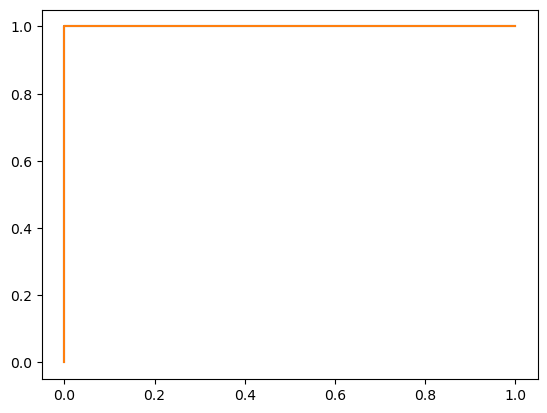

In [35]:
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_test, tpr_test)

In [38]:
thrs

array([          inf, 9.9891520e-01, 9.9878734e-01, 9.9866104e-01,
       9.9854088e-01, 9.9850333e-01, 9.9845028e-01, 9.9832779e-01,
       9.9827266e-01, 9.9824405e-01, 9.9820781e-01, 9.9814677e-01,
       9.9811184e-01, 9.9800092e-01, 9.9790359e-01, 9.9772400e-01,
       9.9768102e-01, 9.9646997e-01, 9.9592423e-01, 9.9359149e-01,
       9.9321753e-01, 9.9114835e-01, 9.8958033e-01, 9.8943835e-01,
       9.8923677e-01, 8.9283711e-01, 2.6799574e-02, 2.2924628e-02,
       4.0820036e-03, 3.8990763e-03, 3.0861751e-03, 2.8556134e-03,
       2.8487891e-03, 1.9753133e-03, 1.8581342e-03, 1.7387434e-03,
       1.6604940e-03, 1.5619613e-03, 1.4615727e-03, 1.4414521e-03,
       1.3949542e-03, 1.2932670e-03, 1.2753383e-03, 1.2380441e-03,
       1.2003445e-03, 1.1286174e-03, 1.0564891e-03, 9.7507221e-04],
      dtype=float32)

In [36]:
xgbc.feature_importances_

array([0.00799555, 0.00245773, 0.        , 0.00159949, 0.00424959,
       0.        , 0.28672266, 0.        , 0.04268863, 0.        ,
       0.        , 0.00983086, 0.        , 0.        , 0.        ,
       0.12997614, 0.06114563, 0.        , 0.        , 0.00625532,
       0.        , 0.16520883, 0.        , 0.        , 0.03919055,
       0.        , 0.        , 0.        , 0.01519918, 0.00313798,
       0.15276907, 0.        , 0.        , 0.0141927 , 0.        ,
       0.00140104, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01633901, 0.00460803,
       0.        , 0.        , 0.        , 0.        , 0.02329936,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00196168,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
best_thr = thrs[np.argmax(tpr_test - fpr_test)]
best_thr

0.8928371

In [40]:
y_test_bin = np.where(y_test_pred >= best_thr, 1, 0)

In [42]:
from helpers import print_scores

In [43]:
print_scores(y_test, y_test_bin)

F1: 1.000
Accuracy: 1.000
Precision: 1.000
ROC AUC: 1.000
Recall: 1.000


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtc = DecisionTreeClassifier(max_depth=9)

In [47]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

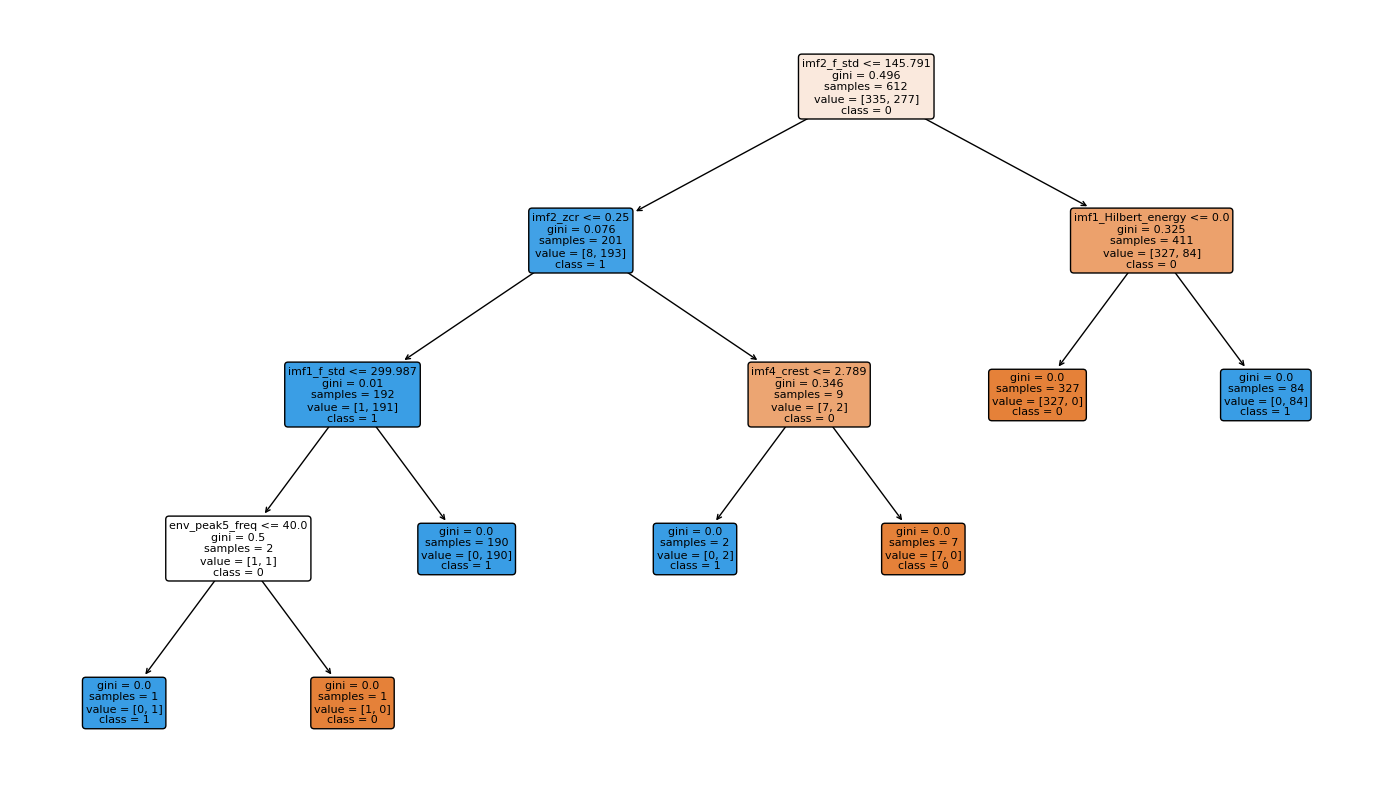

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 8))
plot_tree(
    dtc,
    feature_names=list(X_train.columns),
    class_names=[str(c) for c in dtc.classes_],  # omit for regressor
    filled=True, rounded=True, fontsize=8
)
plt.tight_layout()
plt.show()
# Save:
# plt.savefig("tree.png", dpi=200, bbox_inches="tight")
